In [1]:
import statsmodels.api as sm
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# pip install sklearn

In [3]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline


In [4]:
cancer = sm.datasets.cancer.load_pandas()

In [7]:
cancer.data

,cancer,population
0,1.0,445.0
1,0.0,559.0
2,3.0,677.0
3,4.0,681.0
4,3.0,746.0
...,...,...
296,250.0,62931.0
297,267.0,63476.0
298,244.0,66676.0
299,248.0,74005.0


In [8]:
print(sm.datasets.cancer.DESCRSHORT)
print(sm.datasets.cancer.DESCRLONG)
print(sm.datasets.cancer.NOTE)

Breast Cancer and county population
The number of breast cancer observances in various counties
::

    Number of observations: 301
    Number of variables: 2
    Variable name definitions:

        cancer - The number of breast cancer observances
        population - The population of the county




In [9]:
cancer.data.head()

,cancer,population
0,1.0,445.0
1,0.0,559.0
2,3.0,677.0
3,4.0,681.0
4,3.0,746.0


In [10]:
carseats = sm.datasets.get_rdataset(dataname="Carseats", package="ISLR", cache=True)

In [16]:
carseats.__doc__

'.. container::\n\n   .. container::\n\n      ======== ===============\n      Carseats R Documentation\n      ======== ===============\n\n      .. rubric:: Sales of Child Car Seats\n         :name: sales-of-child-car-seats\n\n      .. rubric:: Description\n         :name: description\n\n      A simulated data set containing sales of child car seats at 400\n      different stores.\n\n      .. rubric:: Usage\n         :name: usage\n\n      .. code:: R\n\n         Carseats\n\n      .. rubric:: Format\n         :name: format\n\n      A data frame with 400 observations on the following 11 variables.\n\n      ``Sales``\n         Unit sales (in thousands) at each location\n\n      ``CompPrice``\n         Price charged by competitor at each location\n\n      ``Income``\n         Community income level (in thousands of dollars)\n\n      ``Advertising``\n         Local advertising budget for company at each location (in\n         thousands of dollars)\n\n      ``Population``\n         Population

In [17]:
carseats_df = carseats.data

In [18]:
carseats_df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [19]:
X, y = carseats_df.iloc[:, carseats_df.columns !='Sales'], carseats_df['Sales']

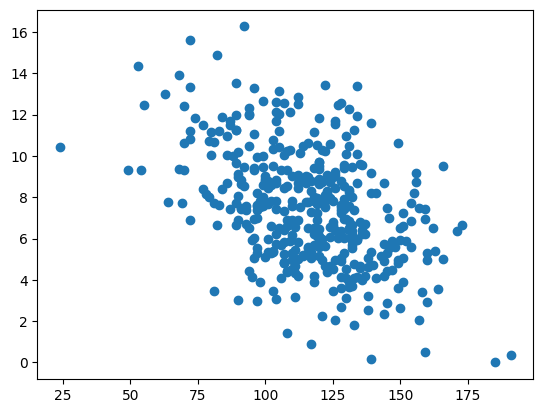

In [20]:
x = X['Price']
plt.scatter(x, y)

In [21]:
np.corrcoef(x, y)[0, 1]

-0.44495072784657264

In [43]:
x1 = np.array(x).reshape(-1, 1)
# x1

In [25]:
lm1 = LinearRegression()

In [26]:
lm1.fit(X=x1, y=y)

LinearRegression()

In [28]:
lm1.coef_

array([-0.05307302])

In [29]:
lm1.intercept_

13.641915176780909

In [33]:
lm1.predict(x1)

array([ 7.27315296,  9.23685464,  9.3960737 ,  8.49383238,  6.84856881,
        9.82065785,  7.91002918,  7.27315296,  7.06086088,  7.06086088,
        8.33461333,  8.65305144,  6.42398466,  9.07763559,  7.37929899,
        5.99940051,  7.80388314,  6.68934975, 10.03294992,  7.22007994,
        6.68934975,  7.85695616,  6.31783862,  7.85695616,  7.64466409,
        9.28992766,  6.68934975,  7.9631022 ,  8.49383238,  8.22846729,
        8.91841653,  6.68934975,  6.37091164,  6.84856881,  6.84856881,
        8.5469054 ,  8.33461333,  7.80388314,  8.22846729,  6.31783862,
        6.95471485,  7.06086088, 12.36816273,  6.5301307 ,  8.59997842,
        6.47705768,  9.92680388,  7.91002918,  8.44075936,  5.73403542,
        7.91002918,  7.91002918,  6.79549579,  7.32622598,  5.99940051,
        5.46867033,  9.18378162,  7.43237201,  8.17539427,  7.59159107,
        7.1139339 ,  7.9631022 ,  6.58320372,  8.28154031,  8.12232125,
        6.84856881,  8.81227049,  7.53851805,  6.5301307 ,  8.38

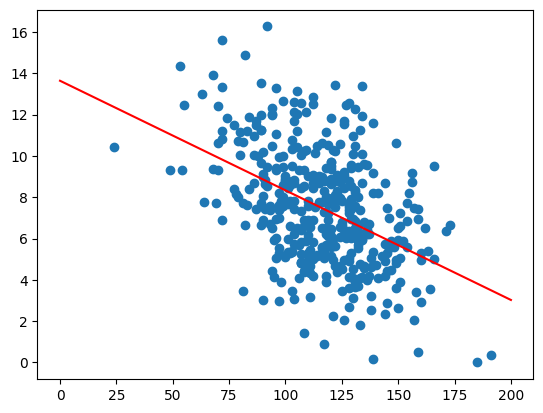

In [35]:
plt.scatter(x, y)
X_plot = np.linspace(0, 200, 200)
plt.plot(X_plot, X_plot*lm1.coef_+lm1.intercept_, color='red')
plt.show()

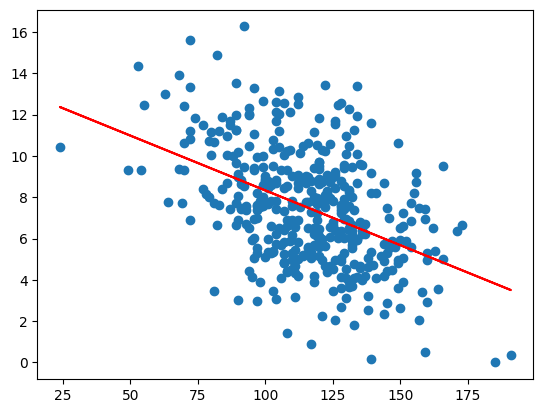

In [37]:
plt.scatter(x, y)
plt.plot(x, x*lm1.coef_+lm1.intercept_, color='red')

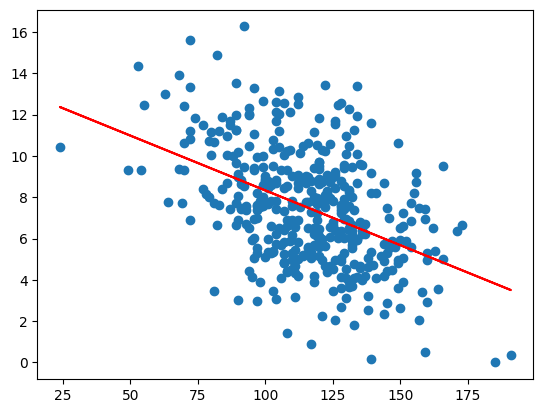

In [39]:
plt.scatter(x, y)
plt.plot(x, lm1.predict(x1), color='red')

In [40]:
lm1.score(x1, y)

0.1979811502111949

In [41]:
np.corrcoef(x, y)[0, 1]**2

0.19798115021119475

In [42]:
x = X['CompPrice']

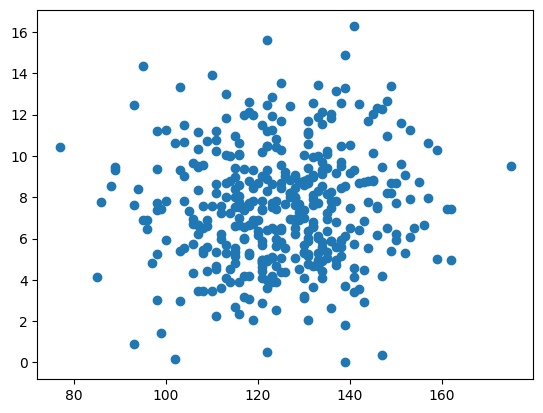

In [44]:
plt.scatter(x, y)

In [45]:
np.corrcoef(x, y)[0, 1]

0.06407872955062155

In [56]:
np.corrcoef(x, y)[0, 1]**2

0.0041060835808217

In [46]:
x1 = np.array(x).reshape(-1, 1)
# x1

In [47]:
lm1 = LinearRegression()

In [48]:
lm1.fit(X=x1, y=y)

LinearRegression()

In [49]:
lm1.coef_

array([0.0118012])

In [50]:
lm1.intercept_

6.021469481874259

In [51]:
lm1.predict(x1)

array([7.65003569, 7.33140317, 7.35500558, 7.4022104 , 7.6854393 ,
       7.48481883, 7.37860799, 7.62643328, 7.57922846, 7.57922846,
       7.44941521, 7.4022104 , 7.46121642, 7.37860799, 7.28419835,
       7.77984894, 7.4140116 , 7.75624653, 7.31960196, 7.54382485,
       7.49662003, 7.60283087, 7.53202364, 7.44941521, 7.73264412,
       7.66183689, 7.28419835, 7.17798751, 7.23699353, 7.24879474,
       7.49662003, 7.62643328, 7.28419835, 7.36680678, 7.37860799,
       7.56742726, 7.46121642, 7.44941521, 7.30780076, 7.55562605,
       7.4258128 , 7.87425857, 6.93016222, 7.47301762, 7.02457185,
       7.6854393 , 7.52022244, 7.50842123, 7.39040919, 7.87425857,
       7.18978872, 7.44941521, 7.82705375, 7.30780076, 7.60283087,
       7.70904171, 7.59102967, 7.11898149, 7.23699353, 7.4140116 ,
       7.46121642, 7.26059594, 7.66183689, 7.4258128 , 7.20158992,
       7.46121642, 7.52022244, 7.50842123, 7.77984894, 7.52022244,
       7.07177667, 7.76804773, 7.37860799, 7.4140116 , 7.79165

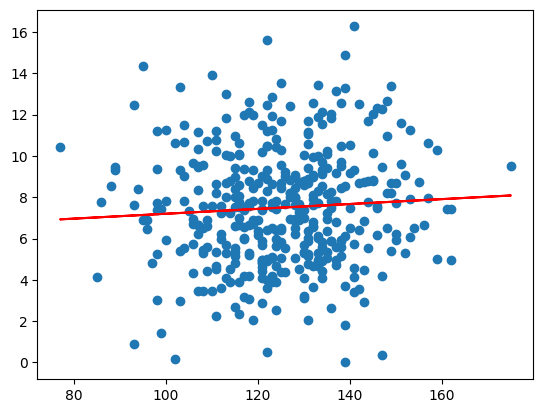

In [53]:
plt.scatter(x, y)
plt.plot(x, lm1.predict(x1), color='red')

In [54]:
lm1.score(x1, y)

0.004106083580821762

In [55]:
np.corrcoef(x, y)[0, 1]**2

0.0041060835808217

In [57]:
salaries = sm.datasets.get_rdataset(dataname="Salaries", package="carData")
salaries.data.head()

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,Prof,B,19,18,Male,139750
1,Prof,B,20,16,Male,173200
2,AsstProf,B,4,3,Male,79750
3,Prof,B,45,39,Male,115000
4,Prof,B,40,41,Male,141500


In [59]:
y = salaries.data['salary']
x = salaries.data['sex']
x1 = np.array(x).reshape(-1, 1)

In [61]:
# lm1 = LinearRegression()
# lm1.fit(x1, y)

In [62]:
enc = OneHotEncoder()
x1_transform = enc.fit_transform(x1).toarray()

In [67]:
x1_transform[:,1].reshape(-1,1)

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],

In [68]:
lm1 = LinearRegression()
lm1.fit(x1_transform[:, 1].reshape(-1, 1), y)

LinearRegression()

In [69]:
lm1.coef_

array([14088.008738])

In [70]:
lm1.intercept_

101002.41025641026

In [71]:
lm2 = LinearRegression()
lm2.fit(x1_transform[:, 0].reshape(-1, 1), y)

LinearRegression()

In [72]:
lm2.coef_

array([-14088.008738])

In [73]:
lm2.intercept_

115090.41899441341

In [74]:
np.unique(carseats_df.ShelveLoc)

array(['Bad', 'Good', 'Medium'], dtype=object)

In [75]:
y = carseats_df["Sales"]
x = carseats_df['ShelveLoc']
x1 = np.array(x).reshape(-1, 1)